# Project Overview 
 
Project from DataCamp

Cookie Cats, developed by Tactile Entertainment, is a popular mobile puzzle game employing the "connect three" puzzle mechanic, requiring players to link tiles of matching colors to clear the board and advance through levels. An intriguing feature is the inclusion of melodious singing cats, which adds to its uniqueness.

As players advance, they encounter gates that enforce a waiting period before progression or prompt in-app purchases. The objective of this project is to scrutinize the outcomes of an A/B test, wherein the initial gate in Cookie Cats was shifted from level 30 to level 40. The primary focus lies on assessing the repercussions on player retention and game rounds.

## Dataset presentation
The dataset involves 90 189 players who installed the game during the AB-test's execution. Notable variables include:

1. `userid`: A distinct identifier for each player.
2. `version`: Denotes whether the player was assigned to the control group (gate_30, level 30 gate) or the test group (gate_40, level 40 gate).
3. `sum_gamerounds`: Signifies the count of game rounds undertaken by a player within the initial week following installation.
4. `retention_1`: Indicates whether the player revisited and played the game 1 day after installation.
5. `retention_7`: Indicates whether the player revisited and played the game 7 days after installation.

Players were randomly allocated to either the gate_30 or gate_40 group upon installing the game.

## Load dataset and first explorations


In [269]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [270]:
data = pd.read_csv('cookie_cats.csv')

In [271]:
print('Total number of entry ', len(data))

Total number of entry  90189


### Usual checks 

In [274]:
data.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [282]:
if data.duplicated().sum() == 0 : 
    print('no duplicated data')
else :
    print(data.duplicated().sum(), 'rows are duplicated : remove them!')
    
nullvalue=data.isnull().sum()
for i in range(len(nullvalue)): 
    if  nullvalue[0]== 0 : 
        print('no null entry in column', nullvalue.index[i])
    else :
        print(nullvalue[0], 'row with null value in column', nullvalue.index[i] ,'explore it !')
    
    
    

no duplicated data
no null entry in column userid
no null entry in column version
no null entry in column sum_gamerounds
no null entry in column retention_1
no null entry in column retention_7


### Explore outlier

In [231]:
data.groupby(['version']).describe().round(2)

userid                                                       \
           count        mean         std    min        25%        50%   
version                                                                 
gate_30  44700.0  4987563.72  2881026.02  116.0  2505469.0  4983631.0   
gate_40  45489.0  5009072.58  2885496.21  377.0  2517171.0  5007329.0   

                               sum_gamerounds                                 \
                75%        max          count   mean     std  min  25%   50%   
version                                                                        
gate_30  7481496.75  9999710.0        44700.0  52.46  256.72  0.0  5.0  17.0   
gate_40  7510762.00  9999861.0        45489.0  51.30  103.29  0.0  5.0  16.0   

                        
          75%      max  
version                 
gate_30  50.0  49854.0  
gate_40  52.0   2640.0

The maximal value of gamerounds play by users in one week in case of gate_30 group is very high (almost 50 000 rounds in one week). 

Let's visualize it : 

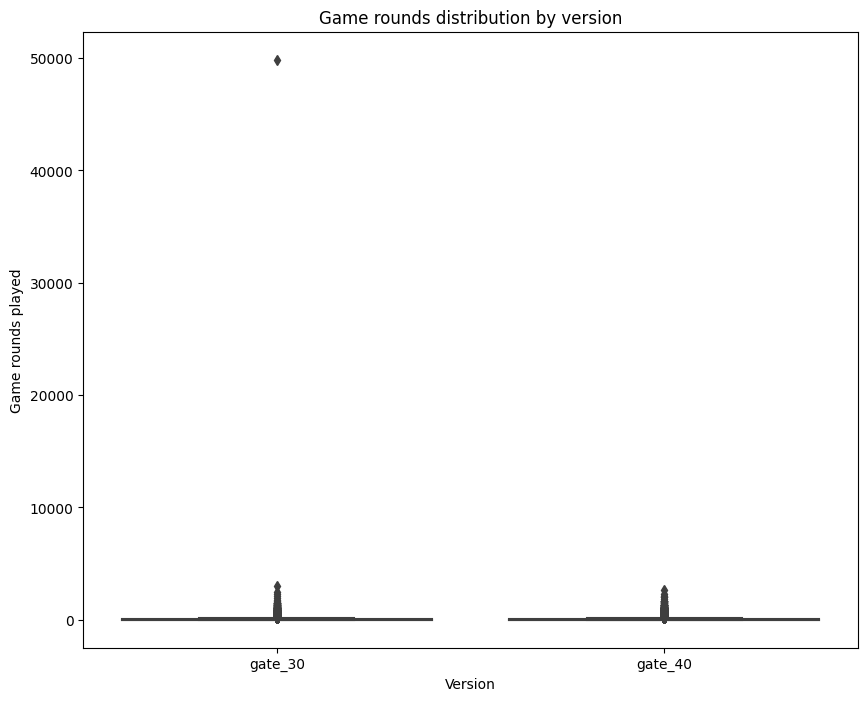

In [283]:

plt.figure(figsize=(10,8))
ax = sns.boxplot(data=data, x='version', y='sum_gamerounds')
plt.title('Game rounds distribution by version')
plt.ylabel('Game rounds played')
plt.xlabel('Version')
plt.show()

It looks like an outlier, probably due to a bug in the game. We will remove it. 

In [284]:
data=data[data.sum_gamerounds<20000]

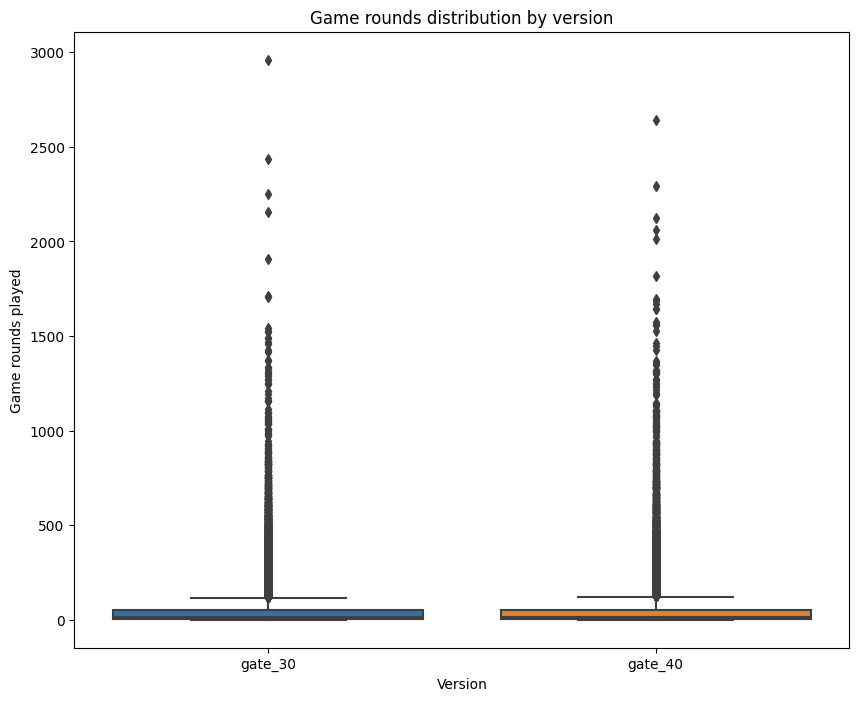

In [285]:
# Let's visualize our statitical information 
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=data, x='version', y='sum_gamerounds')
plt.title('Game rounds distribution by version')
plt.ylabel('Game rounds played')
plt.xlabel('Version')
plt.show()

In [286]:
data[data['sum_gamerounds']==0]['userid'].count()

3994

There are 3 994 users that didn't play the game after downloading. This can be due to several factors:

1. **Installation Mistakes:** Some users might have accidentally downloaded the game or experienced technical issues during installation, leading them to not engage further.

2. **Limited Interest:** Users might have initially shown interest in the game but upon downloading, found that it did not align with their preferences or expectations.

3. **Initial Impression:** The game's initial user experience, graphics, or gameplay might not have resonated with these users, resulting in disinterest.

4. **Device Compatibility:** Compatibility issues with certain devices or operating systems might have prevented these users from playing the game.

5. **External Factors:** Real-life commitments, lack of time, or unforeseen circumstances could have prevented users from engaging with the game.

6. **Competition:** Users might have been engaged with other games or activities, leading them to prioritize those over playing this particular game.

7. **Download for Future Use:** Some users might have downloaded the game with the intention of playing it at a later time, but never got around to it.

8. **Advertising and Marketing:** If the game's marketing did not accurately represent the gameplay, users might have downloaded it out of curiosity but did not find it engaging enough to continue.


We remove those players.

In [287]:
data=data[data['sum_gamerounds']>0]

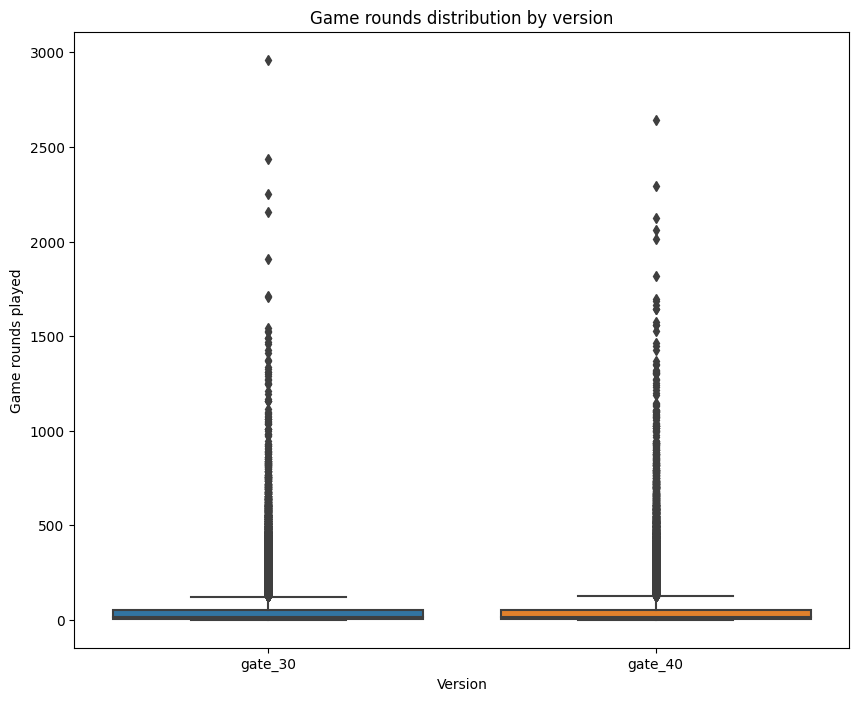

In [288]:
# Let's visualize our statitical information 
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=data, x='version', y='sum_gamerounds')
plt.title('Game rounds distribution by version')
plt.ylabel('Game rounds played')
plt.xlabel('Version')
plt.show()

In [289]:
data[['sum_gamerounds','version']].groupby(['version']).describe().round(2)

sum_gamerounds                                             
                 count   mean     std  min  25%   50%   75%     max
version                                                            
gate_30        42762.0  53.67  103.74  1.0  6.0  18.0  53.0  2961.0
gate_40        43432.0  53.73  105.09  1.0  6.0  18.0  55.0  2640.0

By removing the outliers, the dataset is now more stable and equitable between the two groups, which will allow us to do A/B testing.


## Data explorations

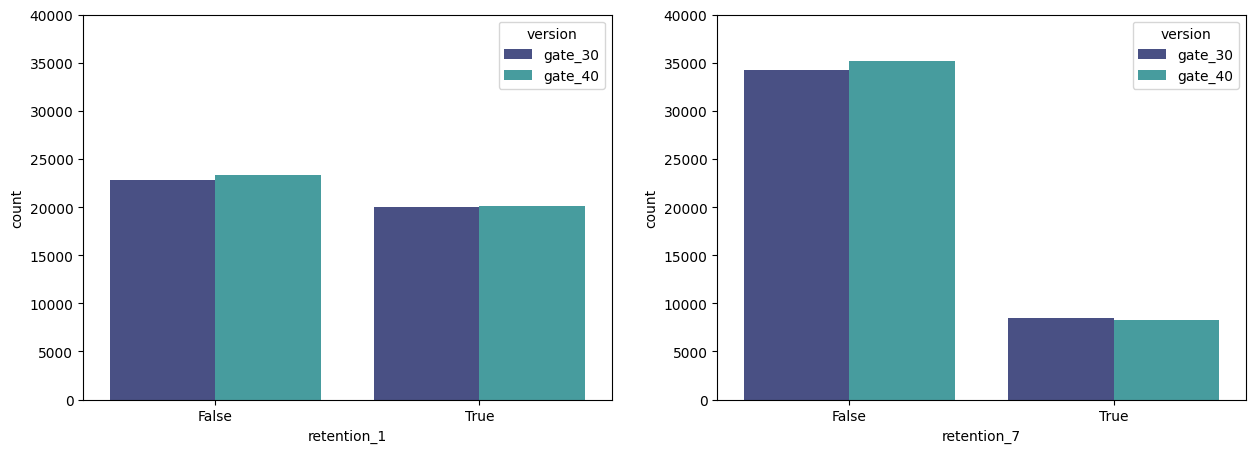

In [290]:
fig, axes = plt.subplots(1, 2,figsize=(15, 5))

sns.countplot(ax=axes[0],data=data, x='retention_1', hue='version', palette='mako')
sns.countplot(ax=axes[1],data=data, x='retention_7', hue='version', palette='mako')

axes[0].set_ylim(0, 40000)
axes[1].set_ylim(0, 40000)
plt.show()


As expected retention at day 1 is higher (around 46%) than at day 7 (around 19%), independly of the group chosen. 

In [291]:
data['retention_1_int'] = data['retention_1']
data['retention_1_int']=data['retention_1_int'].replace({True: 1, False: 0})

data['retention_7_int'] = data['retention_7']
data['retention_7_int']=data['retention_7_int'].replace({True: 1, False: 0})

In [292]:
retention_rate = data.groupby('version').agg({'retention_1_int':'mean', 'retention_7_int':'mean'}).reset_index()

In [293]:
retention_rate

,version,retention_1_int,retention_7_int
0,gate_30,0.467541,0.198424
1,gate_40,0.462171,0.190321


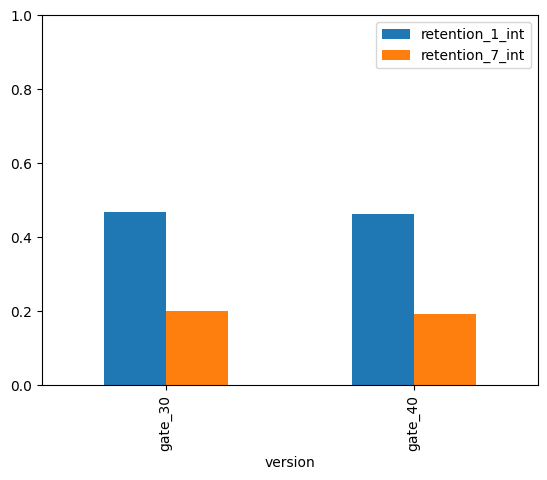

In [294]:
retention_rate.plot(x='version',
        kind='bar',
        stacked=False,
        title='')
plt.ylim(0,1)
plt.show()

In the 'gate_30' group, approximately 46.75% of users sustained their engagement one day after installing the game. Conversely, for the 'gate_40' version, around 46.22% of users remained involved. There exists a subtle distinction in the retention rates between the two versions, with 'gate_30' exhibiting a slightly superior rate compared to 'gate_40'.

After the span of seven days following game installation, the mean retention rate for the 'gate_30' variant stands at 19.84%, whereas for the 'gate_40' version, it slightly diminishes to 19.03%. This implies that users who navigate through 'gate_30' show a slightly greater inclination to remain active and engaged with the game during the initial week of installation, in comparison to those who navigate through 'gate_40'.

The subsequent A/B test aims to determine the statistical significance of this observed variance in retention rates between the 'gate_30' and 'gate_40' groups.

## A/B Test

Now, let's perform our A/B Test. To do that, first we need to get our control and test. In this case version 'gate_30' will be our control (A) group while 'gate_40' is our test group (B)

In [333]:
control = data[data['version']=='gate_30']
test = data[data['version']=='gate_40']

Hypothesis : 


- Null Hypothesis (HO): There's no statistical significance in the retention rate, it comes from randomness
- Alyernative Hypothesis (HA): There's a statistical significance between both average


We need to test the normality of the distribution we are looking at. To do it, I used a Shapiro test. If the distribution is normal, we will used z-test for comparing the two group's retention rate. If the distribution is not normal, we will use non-parametric test (in this case Mann Whitney U test).

In [334]:
def shapiro_test(data, parameter, name='Control'):
    print(name + ' group with parameter', parameter, 'is : ' )
    if shapiro(data[parameter])[1]<0.05: 
        print('    Not normal, use non-parametric test')
    else : 
        print('    Normal distribution, you can use parametric test')
    

In [335]:
shapiro_test(control, 'retention_1_int')
shapiro_test(control, 'retention_7_int', name='Test')
shapiro_test(test, 'retention_1_int')
shapiro_test(test, 'retention_7_int', name='Test')

Control group with parameter retention_1_int is : 
    Not normal, use non-parametric test
Test group with parameter retention_7_int is : 
    Not normal, use non-parametric test
Control group with parameter retention_1_int is : 
    Not normal, use non-parametric test
Test group with parameter retention_7_int is : 
    Not normal, use non-parametric test


/root/.pyenv/versions/3.10.6/envs/python_3106/lib/python3.10/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Mann-Whitney U test is a non-parametric statistical test used to compare the distributions of two independent samples. 

In [340]:
def manntest(df_control, df_test, param):
    # Non-Parametric Test
    mtest = stats.mannwhitneyu(df_control[param], df_test[param])[1] 

    # Result
    temp = pd.DataFrame({
            "AB Hypothesis":[mtest < 0.05], 
            "p-value":[mtest]})

    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")
    temp = temp[["AB Hypothesis", "p-value", "Comment"]]

    return temp

In [342]:
manntest(control, test,'retention_1_int')

,AB Hypothesis,p-value,Comment
0,Fail to Reject H0,0.113974,A/B groups are similar!


In [343]:
manntest(control, test,'retention_7_int')

,AB Hypothesis,p-value,Comment
0,Reject H0,0.002646,A/B groups are not similar!


## Conclusion 

When assessing day 1 retention, the presence of gates at level 30 or 40 demonstrates minimal impact on the player retention rate. However, as day 7 approaches, the implementation of gates at these levels does indeed affect retention.

Since we know the exact value of the 7 day player retention rate for both groups, we can say that the move to increase gate level from 30 to 40 has a negative impact on this specific metric. The difference is slight but it's significant.

Based on these findings, I recommend maintaining the gate at level 30.
